In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestleapNew2/'

In [4]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])

In [5]:
fP2=nc.Dataset(glob.glob('/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestSNAPe3tn/SalishSea_1d_*_dian_T*.nc')[0])

In [6]:
fP.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'time_instant', 'time_instant_bounds', 'RIVNO3', 'PHYSTRNO3', 'ALLTRNO3', 'NO3_E3TSNAP', 'PPDIATNO3V', 'PPPHYNO3V', 'PPMRUBNO3V', 'NITR', 'NO3RAD', 'ATF_NO3', 'SMS_NO3', 'RDB_NO3', 'RDN_NO3', 'REM_NO3'])

In [7]:
fP2.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'time_instant', 'time_instant_bounds', 'RIVNO3', 'BIOTRNO3', 'PHYSTRNO3', 'ALLTRNO3', 'AFILTNO3', 'NO3_E3T', 'NO3SNAP', 'NO3_E3TSNAP', 'PPDIATNO3V', 'PPPHYNO3V', 'PPMRUBNO3V', 'NITR', 'NO3RADB', 'NO3RADN'])

In [8]:
allSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['ALLTRNO3'][:,:,:,:],3),2),1)
afiltSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['ATF_NO3'][:,:,:,:],3),2),1)
no3Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fP.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1)
nitrSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['NITR'][:,:,:,:],3),2),1)
PPSum=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['PPDIATNO3V'][:,:,:,:]+\
                                             fP.variables['PPPHYNO3V'][:,:,:,:]+\
                                             fP.variables['PPMRUBNO3V'][:,:,:,:]),3),2),1)
rivSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['RIVNO3'][:,:,:,:],3),2),1)-nitrSum+PPSum
physSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['PHYSTRNO3'][:,:,:,:],3),2),1)-rivSum-nitrSum+PPSum

In [9]:
physSum2=np.sum(np.sum(np.sum(tmaskSOG*fP2.variables['PHYSTRNO3'][:,:,:,:],3),2),1)
allSum2=np.sum(np.sum(np.sum(tmaskSOG*fP2.variables['ALLTRNO3'][:,:,:,:],3),2),1)
afiltSum2=np.sum(np.sum(np.sum(tmaskSOG*fP2.variables['AFILTNO3'][:,:,:,:],3),2),1)
no3Sum2=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fP2.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1)
nitrSum2=np.sum(np.sum(np.sum(tmaskSOG*fP2.variables['NITR'][:,:,:,:],3),2),1)
PPSum2=np.sum(np.sum(np.sum(tmaskSOG*(fP2.variables['PPDIATNO3V'][:,:,:,:]+\
                                             fP2.variables['PPPHYNO3V'][:,:,:,:]+\
                                             fP2.variables['PPMRUBNO3V'][:,:,:,:]),3),2),1)
rivSum2=np.sum(np.sum(np.sum(tmaskSOG*fP2.variables['RIVNO3'][:,:,:,:],3),2),1)

In [10]:
no3diff=(no3Sum[1:]-no3Sum[:-1])/(24*3600)
no3diff2=(no3Sum2[1:]-no3Sum2[:-1])/(24*3600)
#no3diff2=np.concatenate((no3diff,[(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fT.variables['NO3_E3T'][-1,:,:,:])))-no3sum[-1])/(23*3600)]))

In [11]:
afiltSum

masked_array(data=[-55.97147750854492, -12.056406021118164,
                   16.258079528808594, 50.538490295410156,
                   3.964571952819824],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

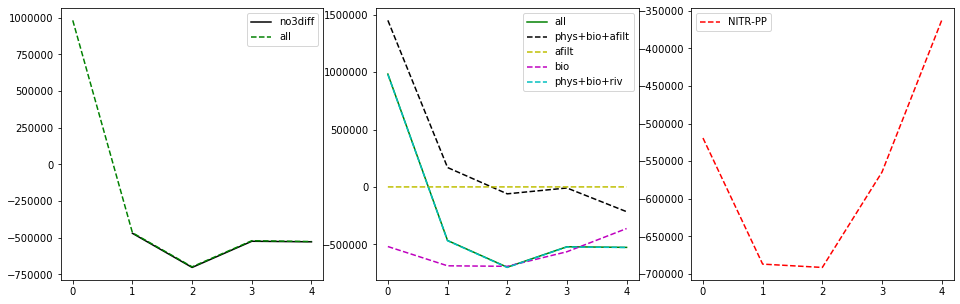

In [12]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,5),no3diff,'k-',label='no3diff')
ax[0].plot(range(0,5),allSum,'g--',label='all')
#ax[0].plot(range(0,5),afiltSum,'b--',label='afilt')
ax[0].legend()
ax[1].plot(range(0,5),allSum,'g-',label='all')
ax[1].plot(range(0,5),physSum,'k--',label='phys+bio+afilt')
ax[1].plot(range(0,5),afiltSum,'y--',label='afilt')
ax[1].plot(range(0,5),nitrSum-PPSum,'m--',label='bio')
ax[1].plot(range(0,5),physSum+nitrSum-PPSum+rivSum,'c--',label='phys+bio+riv')
#ax[1].plot(range(0,5),bioSum,'k-',label='bio')
#ax[1].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[1].legend()
ax[2].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[2].legend()

(-800000, 100000)

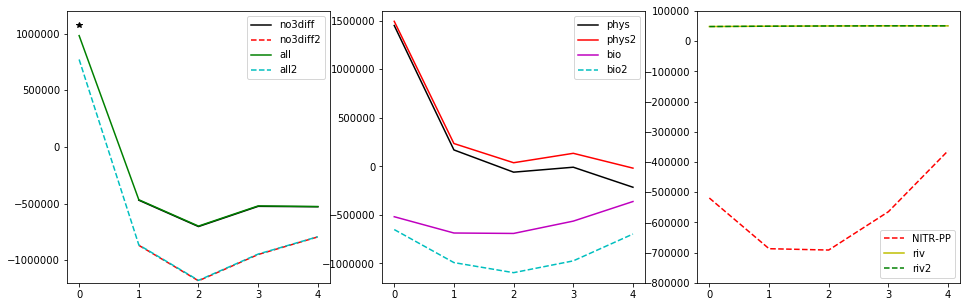

In [13]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,5),no3diff,'k-',label='no3diff')
ax[0].plot(range(1,5),no3diff2,'r--',label='no3diff2')
ax[0].plot(range(0,5),allSum,'g-',label='all')
ax[0].plot(range(0,5),allSum2,'c--',label='all2')
ax[0].plot(0,allSum[0]*1.1,'k*')
ax[0].legend()
ax[0].set_ylim(-1200000,1200000)
ax[1].plot(range(0,5),physSum,'k-',label='phys')
ax[1].plot(range(0,5),physSum2,'r-',label='phys2')
ax[1].plot(range(0,5),nitrSum-PPSum,'m-',label='bio')
ax[1].plot(range(0,5),nitrSum2-PPSum2,'c--',label='bio2')
#ax[1].plot(range(0,5),afiltSum,'y--',label='afilt')
#ax[1].plot(range(0,5),nitrSum-PPSum,'m--',label='bio')
#ax[1].plot(range(0,5),physSum+nitrSum-PPSum+rivSum,'c--',label='phys+bio+riv')
#ax[1].plot(range(0,5),bioSum,'k-',label='bio')
#ax[1].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[1].legend()
ax[1].set_ylim(-1200000,1600000)
ax[2].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[2].plot(range(0,5),rivSum,'y-',label='riv')
ax[2].plot(range(0,5),rivSum2,'g--',label='riv2')
ax[2].legend()
ax[2].set_ylim(-800000,100000)

In [14]:
(nitrSum2-PPSum2)/(nitrSum-PPSum)

masked_array(data=[1.25459885597229, 1.4434630870819092,
                   1.5844157934188843, 1.7250609397888184,
                   1.9238179922103882],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [15]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Malaspina_U*.nc')[0]) as f:
    malUA=np.sum(np.sum(f.variables['NO3TVDX'][:,:,:,0],2),1)
    malUD=np.sum(np.sum(f.variables['ULDFNO3'][:,:,:,0],2),1)

In [16]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Haro_V*.nc')[0]) as f:
    harVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    harVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

In [17]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_SJC_V*.nc')[0]) as f:
    sjcVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    sjcVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

In [18]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Rosario_V*.nc')[0]) as f:
    rosVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    rosVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

In [19]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0]) as f:
    sutVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    sutVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

In [20]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Discovery_V*.nc')[0]) as f:
    disVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    disVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

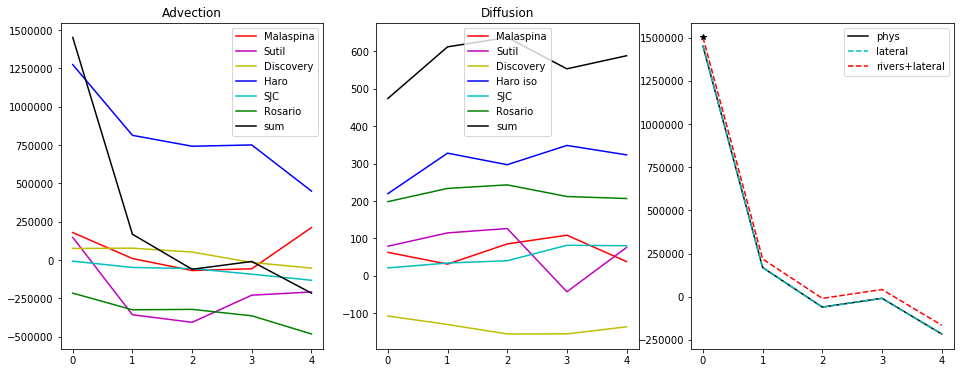

In [21]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUA,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVA,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVA,'y-',label='Discovery')
ax[0].plot(range(0,5),harVA,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVA,'c-',label='SJC')
ax[0].plot(range(0,5),rosVA,'g-',label='Rosario')
adv=harVA+sjcVA+rosVA-disVA-sutVA-malUA
ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUD,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVD,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVD,'y-',label='Discovery')
ax[1].plot(range(0,5),harVD,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVD,'c-',label='SJC')
ax[1].plot(range(0,5),rosVD,'g-',label='Rosario')
dif=harVD+sjcVD+rosVD-disVD-sutVD-malUD
ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),physSum,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'c--',label='lateral')
ax[2].plot(range(0,5),adv+dif+rivSum,'r--',label='rivers+lateral')
ax[2].plot(0,adv[0]+dif[0]+rivSum[0],'k*')
#ax[2].plot(np.arange(0.5,4,1),no3diff,'k--',label='no3diff')
ax[2].legend()

In [22]:
adv[0],dif[0],rivSum[0],adv[0]+dif[0],adv[0]+dif[0]+rivSum[0],physSum[0]

(1451595.0, 473.80386, 48516.0, 1452068.8, 1500584.8, 1450555.6)

In [23]:
## phys difference
adv+dif+rivSum-physSum

masked_array(data=[50029.125, 49395.578125, 50608.375, 50949.515625,
                   50664.765625],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [24]:
#old file, day 1:
f0=nc.Dataset('/results/SalishSea/nowcast-green.201812/01may15/SalishSea_1d_20150501_20150501_ptrc_T.nc')
# old file, day 5:
f4=nc.Dataset('/results/SalishSea/nowcast-green.201812/05may15/SalishSea_1d_20150505_20150505_ptrc_T.nc')
# new file:
f=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestleapNew/SalishSea_1d_20150501_20150505_ptrc_T_20150501-20150505.nc')

Text(0.5, 1.0, 'leap-euler\n bSi')

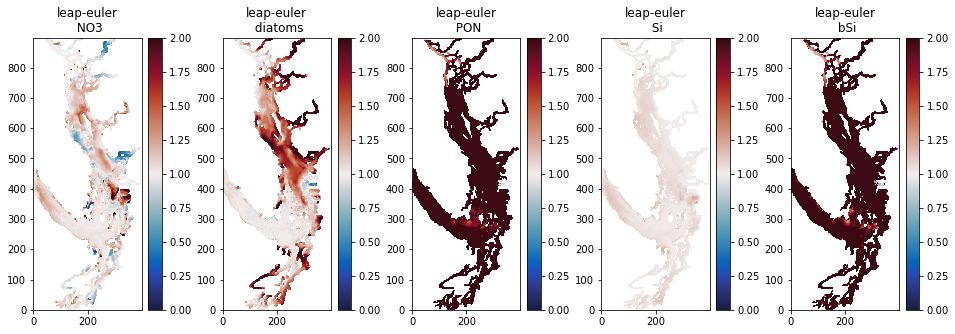

In [25]:
fig,ax=plt.subplots(1,5,figsize=(16,5))
iax=ax[0]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['NO3'][4,0,:,:]/f4.variables['nitrate'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n NO3')

iax=ax[1]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['DIAT'][4,0,:,:]/f4.variables['diatoms'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n diatoms')

iax=ax[2]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['PON'][4,0,:,:]/f4.variables['particulate_organic_nitrogen'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n PON')

iax=ax[3]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['Si'][4,0,:,:]/f4.variables['silicon'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n Si')

iax=ax[4]
fig.subplots_adjust(wspace=.4)
m0=iax.pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f.variables['bSi'][4,0,:,:]/f4.variables['biogenic_silicon'][0,0,:,:]),
                cmap=cmocean.cm.balance,vmin=0,vmax=2)
fig.colorbar(m0,ax=iax)
iax.set_title('leap-euler\n bSi')